## STAT 6289 Assignment 4 Turner Luo
Installing the Magnitude Package:

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [1]:
pip install pymagnitude

Note: you may need to restart the kernel to use updated packages.


Getting Started with Magnitude:

In [2]:
from pymagnitude import *
file_path = "D:/GWU/6289/HW4/GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

## Play around with Magnitude:

You can query the distance of two or multiple keys like so:

In [3]:
vectors.distance("cat","dog")

0.691454

In [7]:
vectors.distance("cat",["dog","pig"])

[0.691454, 1.0150564]

You can check if a key is in the vocabulary like so:

In [4]:
"pig" in vectors

True

You can query the total number of vectors in the file like so:

In [5]:
len(vectors)

3000000

You can query the similarity of two or multiple keys like so:

In [6]:
vectors.similarity("cat", ["dog", "tiger"])

[0.76094574, 0.5172963]

You can query for the most similar key out of a list of keys to a given key like so:

In [8]:
vectors.most_similar_to_given("cat", ["dog", "television", "laptop"])

'dog'

You can also query for the most similar keys giving positive and negative examples (which, incidentally, solves analogies) like so:\
Such as solving analogy: king is to man as woman is to X.\
X + man ≈ king + woman.

In [9]:
vectors.most_similar(positive = ["woman", "king"], negative = ["man"])

[('queen', 0.7118193),
 ('monarch', 0.6189675),
 ('princess', 0.5902431),
 ('crown_prince', 0.5499462),
 ('prince', 0.53773224),
 ('kings', 0.5236845),
 ('Queen_Consort', 0.5235946),
 ('queens', 0.51811343),
 ('sultan', 0.50985944),
 ('monarchy', 0.50874114)]

## 1. What is the dimensionality of these word embeddings? Provide an integer answer.

In [10]:
vectors.dim

300

## 2. What are the top-5 most similar words to picnic (not including picnic itself)? \
\
Check if "picnic" is in the vocabulary:

In [11]:
"picnic" in vectors

True

In [12]:
vectors.most_similar("picnic", topn = 5)

[('picnics', 0.7400875),
 ('picnic_lunch', 0.72137403),
 ('Picnic', 0.70053387),
 ('potluck_picnic', 0.66832733),
 ('picnic_supper', 0.65189123)]

The top 5 most similar words to "picnic" is:\
"picnics" "picnic_lunch" "Picnic" "potluck_picnic" "picnic_supper"\
\
Since "Picnic" is the same as "picnic":

In [16]:
vectors.most_similar("picnic", topn = 6)

[('picnics', 0.7400875),
 ('picnic_lunch', 0.72137403),
 ('Picnic', 0.70053387),
 ('potluck_picnic', 0.66832733),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216)]

"picnics" "picnic_lunch"  "potluck_picnic"  "picnic_supper"  "picnicking"

Visualizing the result:

In [53]:
picnic = vectors.most_similar("picnic", topn = 10)
x = []
y = []
for i in range(10):
    x.append(picnic[i][0])
    y.append(picnic[i][1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

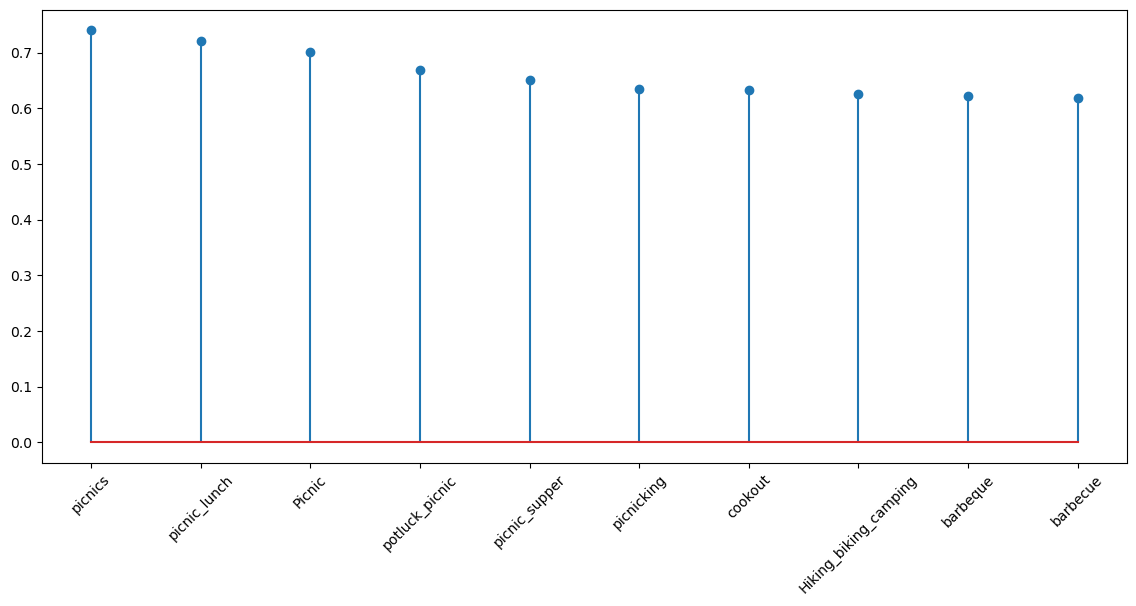

In [57]:
figure(figsize=(14, 6), dpi=100)
plt.stem(x,y)
plt.xticks(rotation=45)

## 3. According to the word embeddings, which of these words is not like the others? ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'] 

In [13]:
vectors.doesnt_match(["tissue", "papyrus", "manila", "newsprint", "parchment", "gazette"])

'tissue'

## 4. Solve the following analogy: leg is to jump as X is to throw. 

X + jump ≈ leg + throw.

In [14]:
vectors.most_similar(positive = ["throw", "leg"], negative = ["jump"])

[('forearm', 0.48294652),
 ('shin', 0.47376174),
 ('elbow', 0.46796894),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605825),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183363),
 ('thigh', 0.45393687),
 ('knee', 0.4455707),
 ('ulna_bone', 0.44234914)]

Visualizing the result:

In [40]:
similar = vectors.most_similar(positive = ["throw", "leg"], negative = ["jump"])
a = []
b = []
for i in range(10):
    a.append(similar[i][0])
    b.append(similar[i][1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

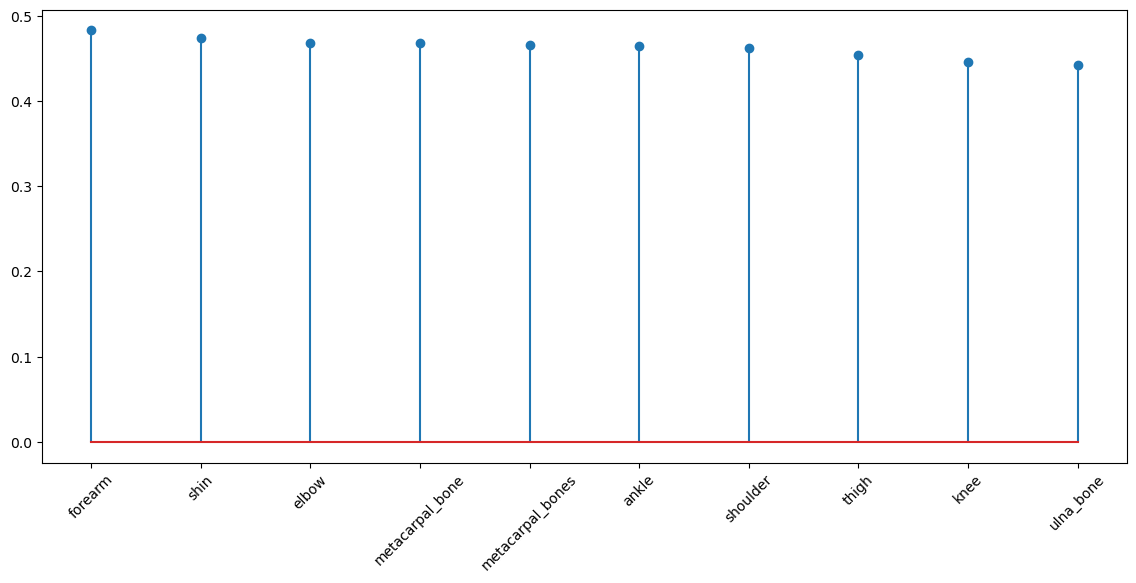

In [56]:
figure(figsize=(14, 6), dpi=100)
plt.stem(a,b)
plt.xticks(rotation = 45)

"forearm" is our best option here.\
## Therefore, solving the analogy: leg is to jump as "forearm" is to throw.